# ***1--IMPORT LIBRARY***

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input/custmer-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# ***2--READ DATA_SET_EXCELSHEET***

In [156]:
file_path = '/kaggle/input/custmer-data/m_L0disbTvu0C4fQXSIYNg_d137b7b970cf4848b0332975d63927e1_Using-bars-columns-and-lines.xlsx'
data = pd.read_excel(file_path)

# ***3-information of The dataset***

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product ID               80 non-null     int64         
 1   Product Category         80 non-null     object        
 2   Product Subcategory      80 non-null     object        
 3   Product Name             80 non-null     object        
 4   Product Description      80 non-null     object        
 5   Product Price            80 non-null     float64       
 6   Product Weight           80 non-null     float64       
 7   Product Size             80 non-null     object        
 8   Product Region           80 non-null     object        
 9   Product Color            80 non-null     object        
 10  Product Stock            80 non-null     int64         
 11  Order ID                 80 non-null     int64         
 12  Customer ID              80 non-null  

In [158]:
print(data.head())

   Product ID Product Category Product Subcategory      Product Name  \
0        1001   Mountain Bikes       Cross Country  TrailBlazer 1000   
1        1002   Mountain Bikes       Cross Country  TrailBlazer 2000   
2        1003       Road Bikes              Racing  SpeedMaster 1000   
3        1004       Road Bikes              Racing  SpeedMaster 2000   
4        1005    Touring Bikes       Long Distance     Explorer 1000   

                    Product Description  Product Price  Product Weight  \
0             Lightweight and versatile         1200.0            25.0   
1        High-performance mountain bike         1500.0            22.0   
2       Agile and aerodynamic road bike         1800.0            18.0   
3              Premium racing road bike         2100.0            16.0   
4  Comfortable and durable touring bike         1300.0            27.0   

  Product Size Product Region Product Color  ...  Month  Order Date  \
0            M  North America           Red  ...  A

# ***4- preprocessing of the data***

In [159]:
data.dropna(inplace=True)

In [160]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Quantity'] = data['Order Quantity'].astype(int)
data['Order Total'] = data['Order Total'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [161]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Quantity'] = data['Order Quantity'].astype(int)
data['Order Total'] = data['Product Price'] * data['Order Quantity']

In [162]:
data['Month'] = data['Order Date'].dt.month_name()

In [163]:
sales_by_category = data.groupby('Product Category')['Order Total'].sum().reset_index()

# ***5- Visualizing data***

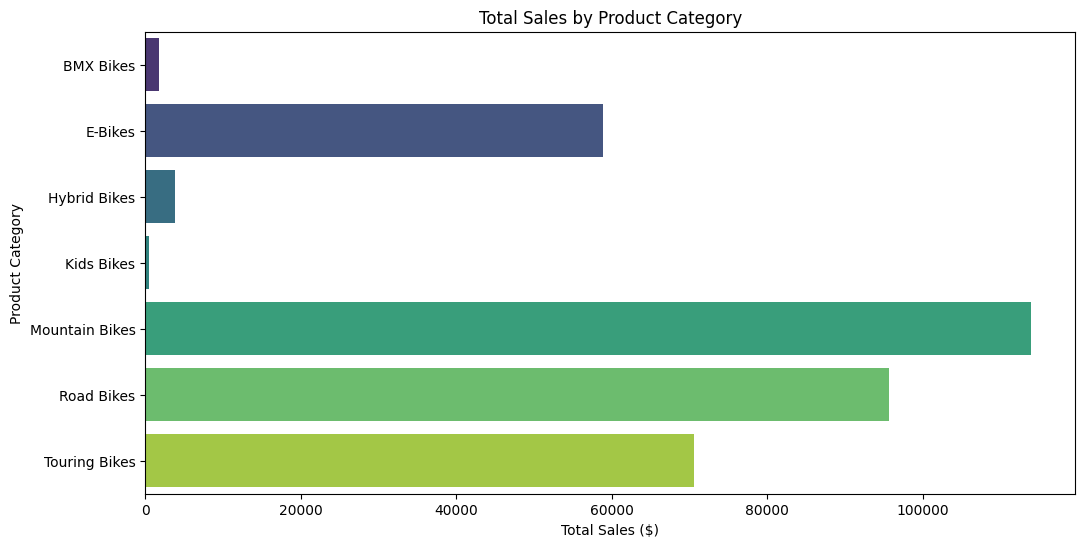

In [164]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Category', data=sales_by_category, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.show()

In [165]:
sales_by_region = data.groupby('Product Region')['Order Total'].sum().reset_index()

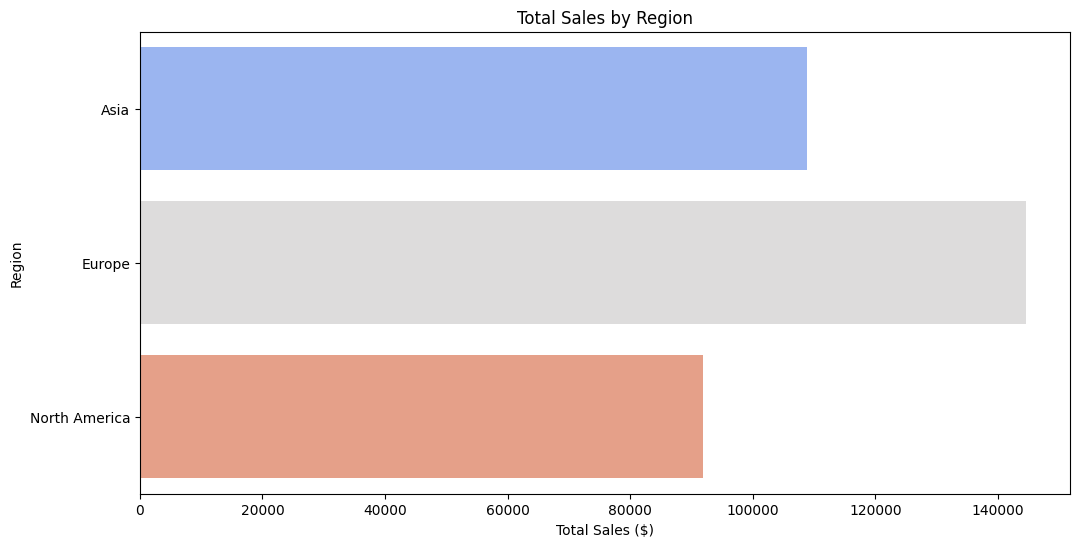

In [166]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Region', data=sales_by_region, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales ($)')
plt.ylabel('Region')
plt.show()

In [167]:
monthly_sales = data.groupby('Month')['Order Total'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

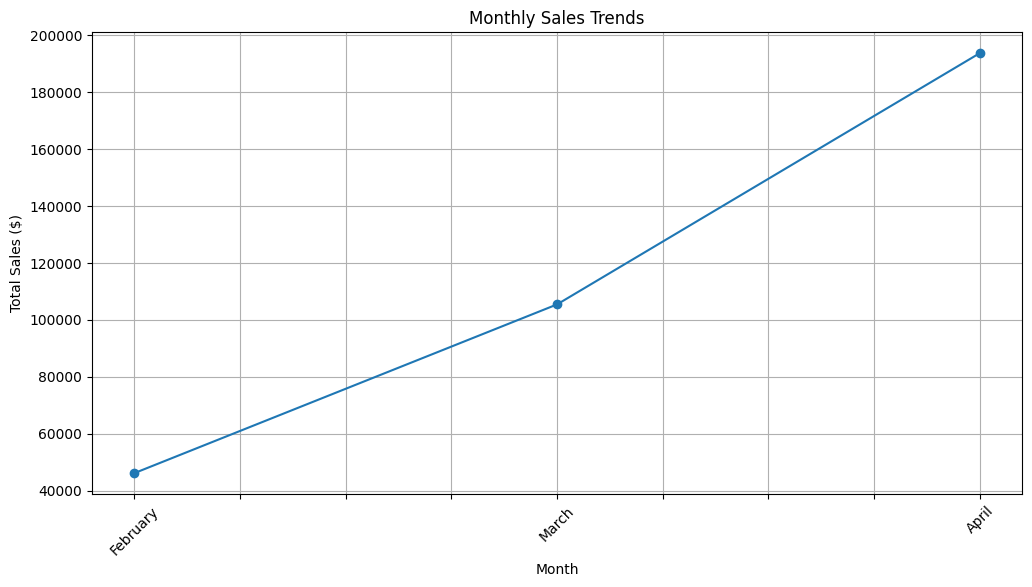

In [168]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [169]:
sales_by_payment = data.groupby('Payment Method')['Order Total'].sum().reset_index()

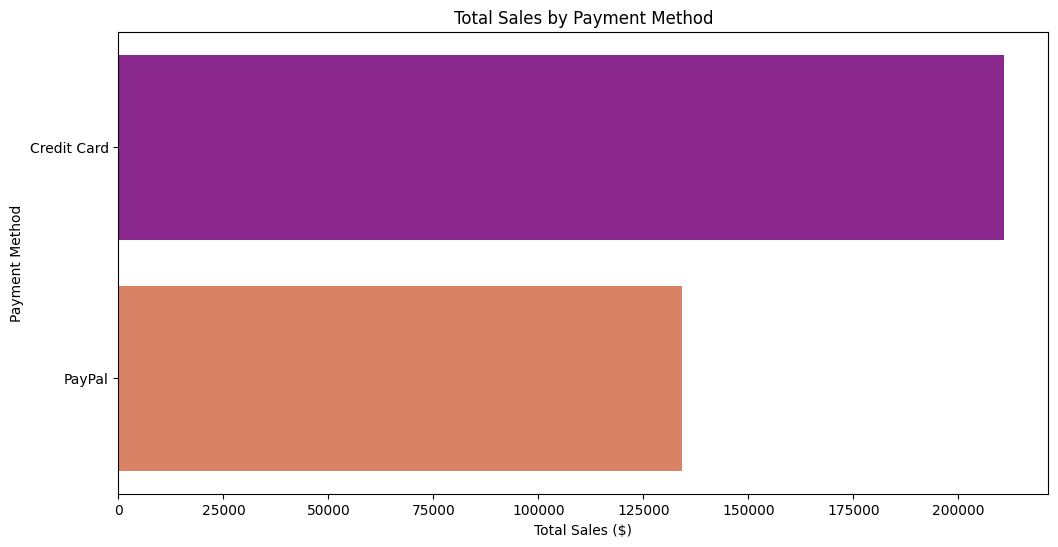

In [170]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Payment Method', data=sales_by_payment, palette='plasma')
plt.title('Total Sales by Payment Method')
plt.xlabel('Total Sales ($)')
plt.ylabel('Payment Method')
plt.show()

In [171]:
feedback_counts = data['Customer Feedback'].value_counts()

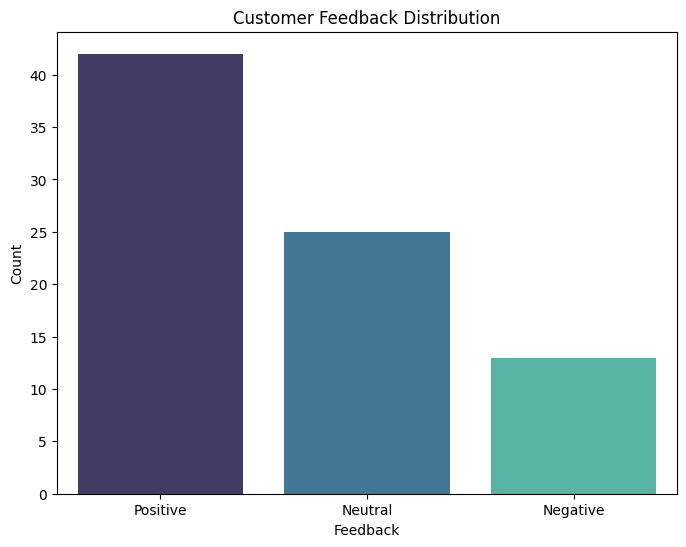

In [172]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='mako')
plt.title('Customer Feedback Distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

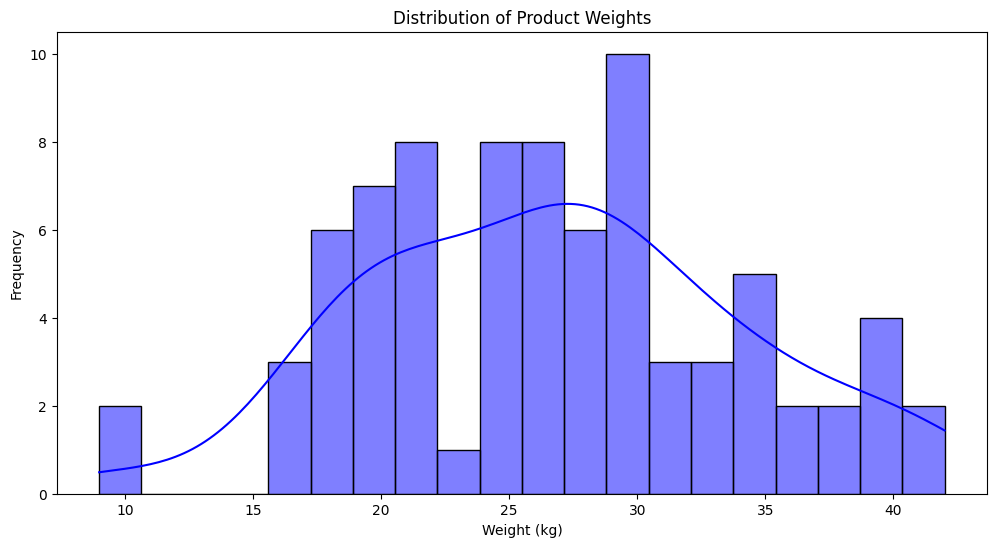

In [173]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Product Weight'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


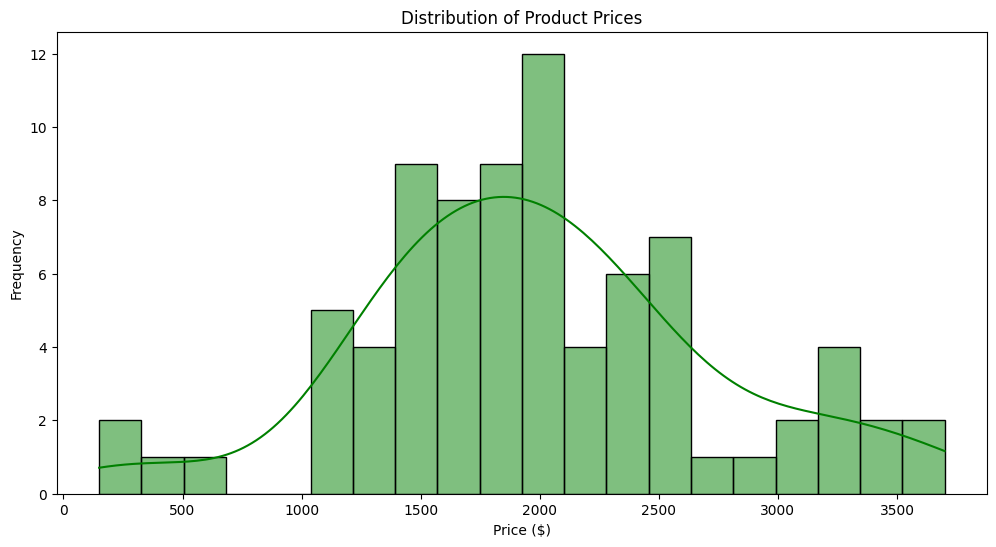

In [174]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Product Price'], bins=20, kde=True, color='green')
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

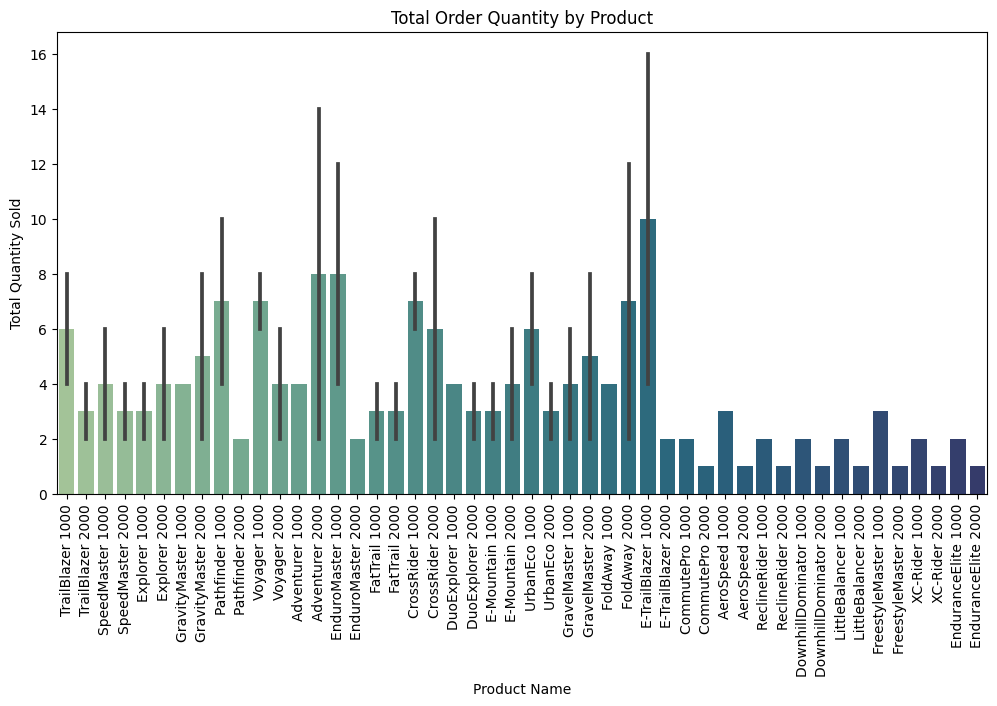

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Order Quantity', data=data, estimator=sum, palette='crest')
plt.title('Total Order Quantity by Product')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

In [176]:
sales_by_status = data.groupby('Order Status')['Order Total'].sum().reset_index()

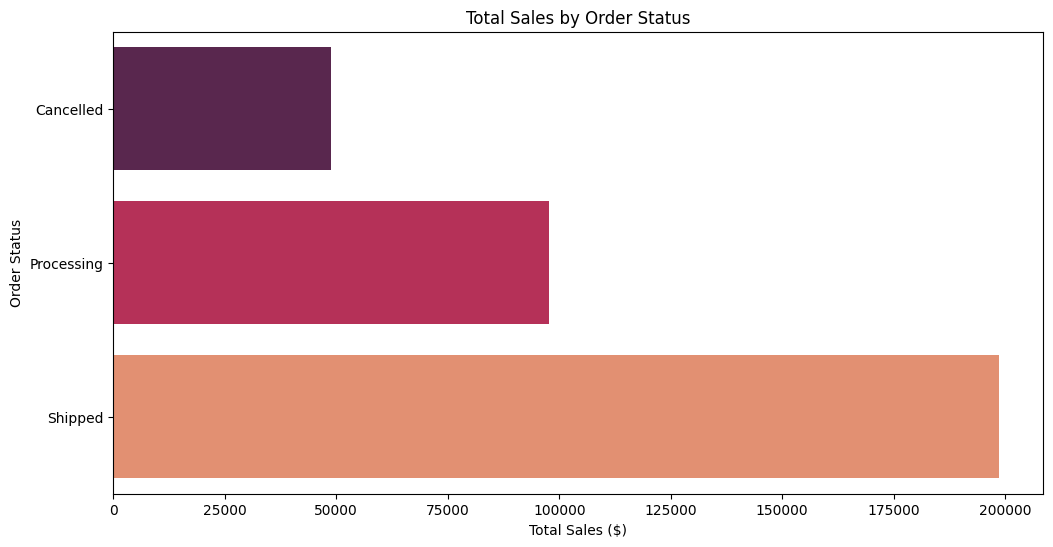

In [177]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Order Status', data=sales_by_status, palette='rocket')
plt.title('Total Sales by Order Status')
plt.xlabel('Total Sales ($)')
plt.ylabel('Order Status')
plt.show()

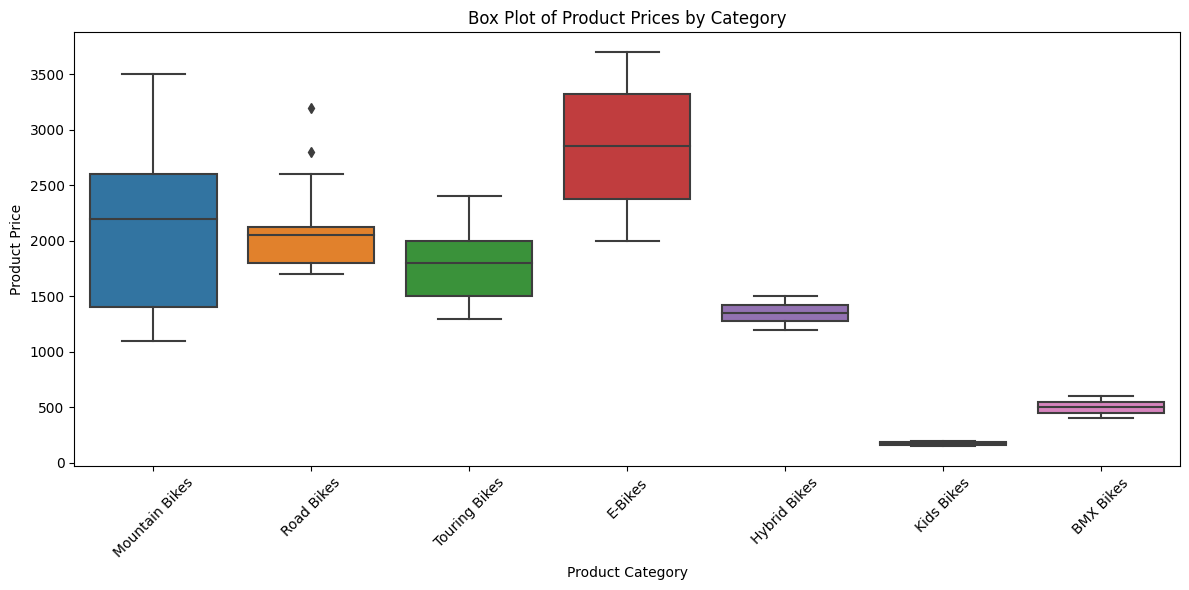

In [178]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Product Price', data=data)
plt.title('Box Plot of Product Prices by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

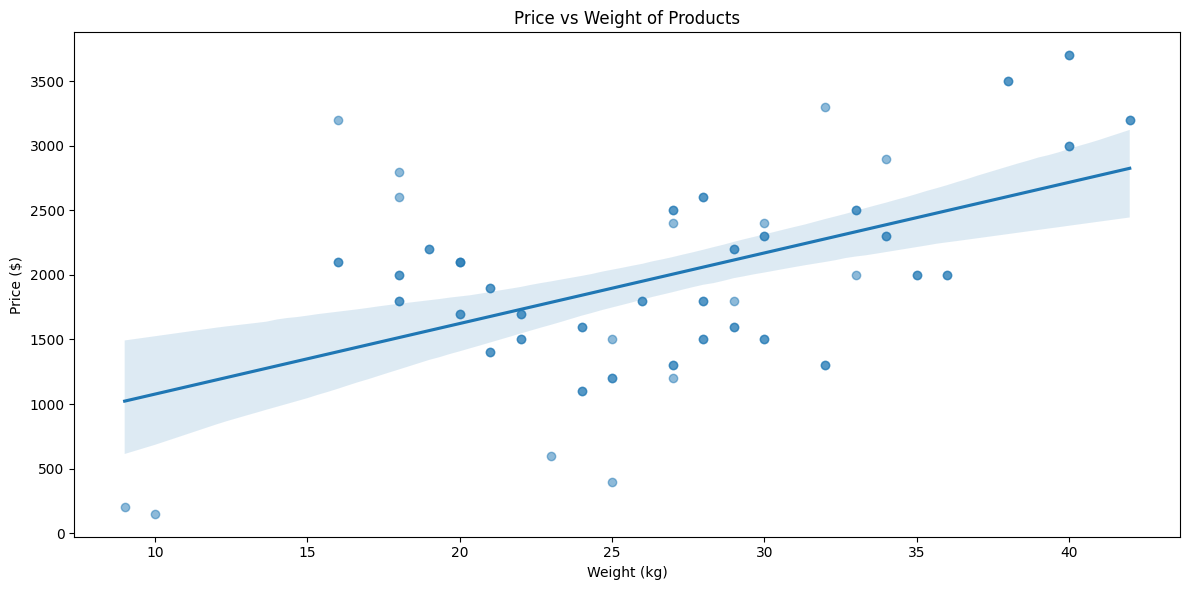

In [179]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Product Weight', y='Product Price', data=data, scatter_kws={'alpha':0.5})
plt.title('Price vs Weight of Products')
plt.xlabel('Weight (kg)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

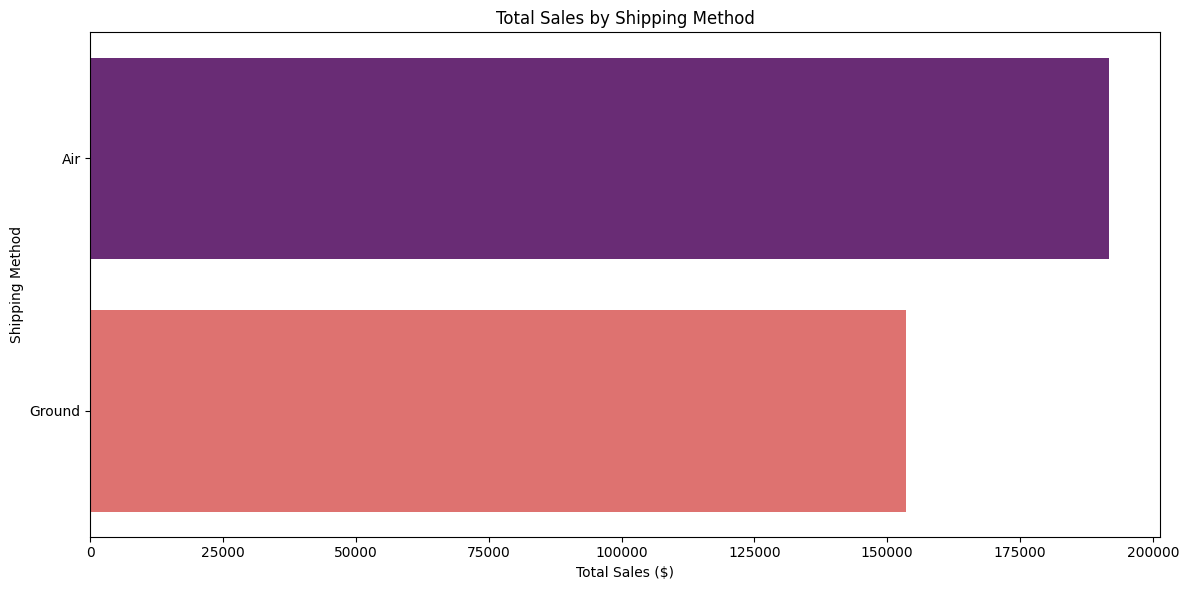

In [180]:
sales_by_shipping = data.groupby('Shipping Method')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Shipping Method', data=sales_by_shipping, palette='magma')
plt.title('Total Sales by Shipping Method')
plt.xlabel('Total Sales ($)')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

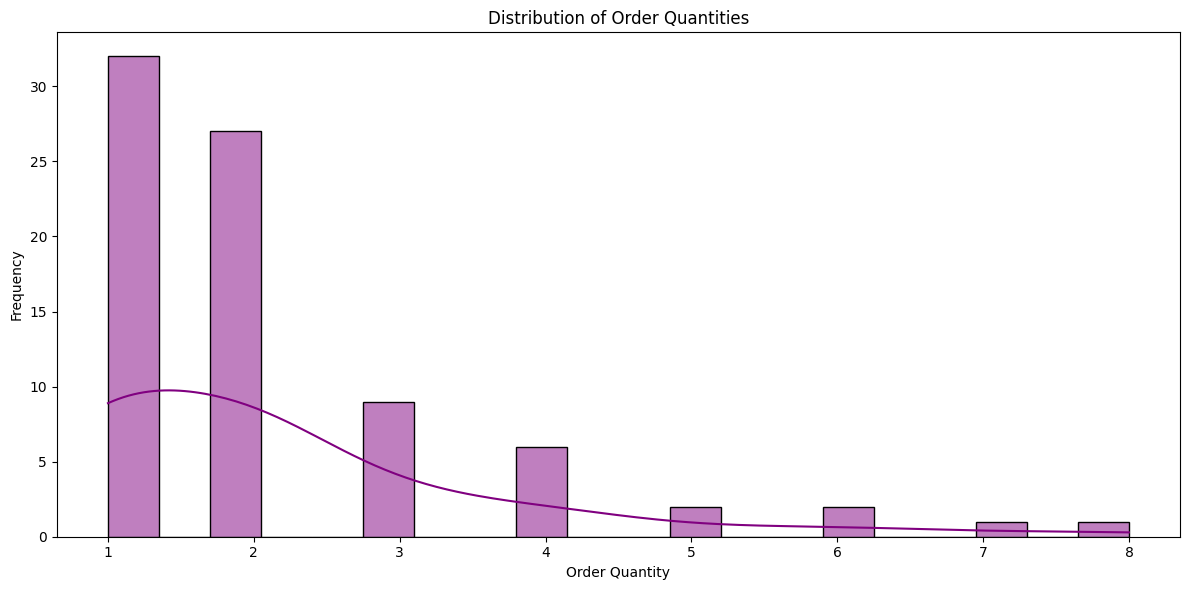

In [181]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Order Quantity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

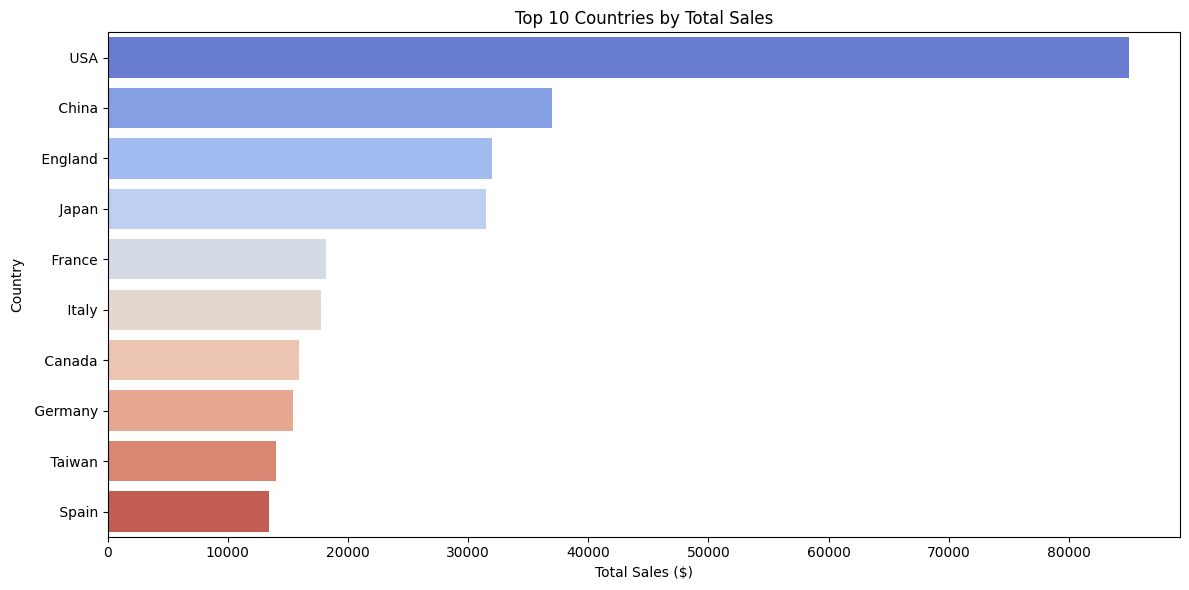

In [182]:
sales_by_country = data.groupby('Customer Location')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Customer Location', data=sales_by_country.sort_values('Order Total', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

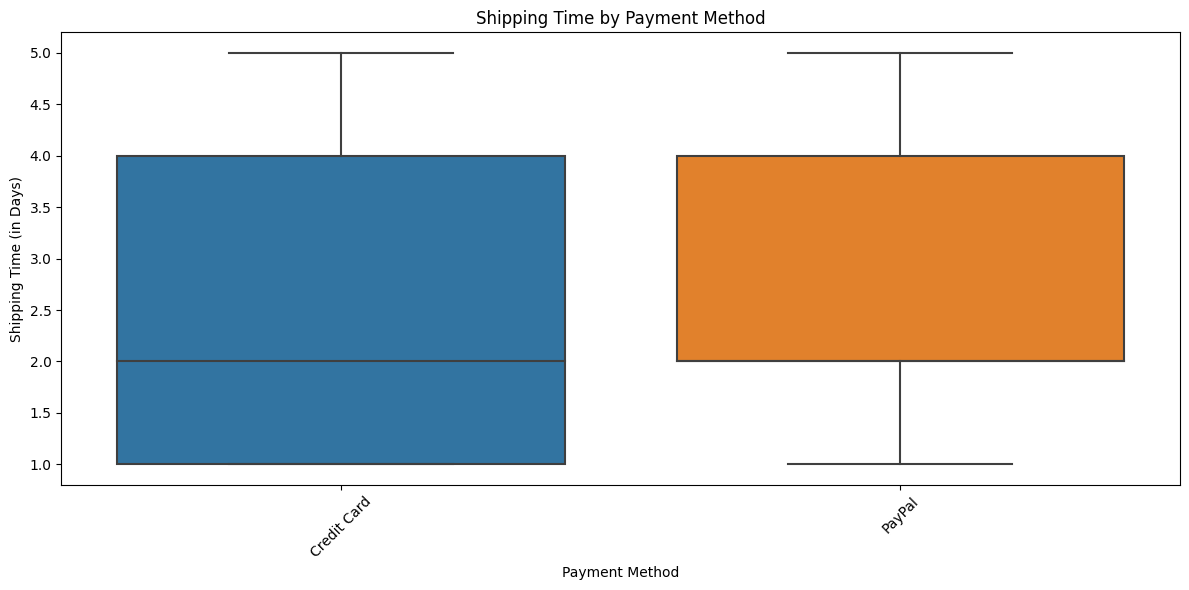

In [183]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment Method', y='Shipping Time (in Days)', data=data)
plt.title('Shipping Time by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

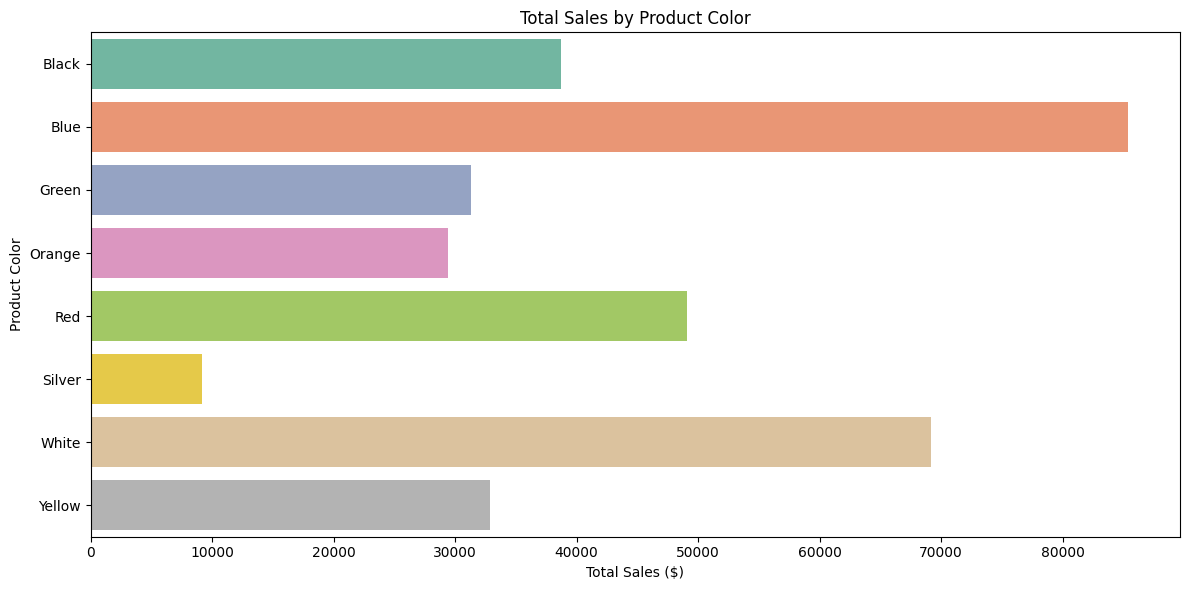

In [184]:
sales_by_color = data.groupby('Product Color')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Color', data=sales_by_color, palette='Set2')
plt.title('Total Sales by Product Color')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Color')
plt.tight_layout()
plt.show()

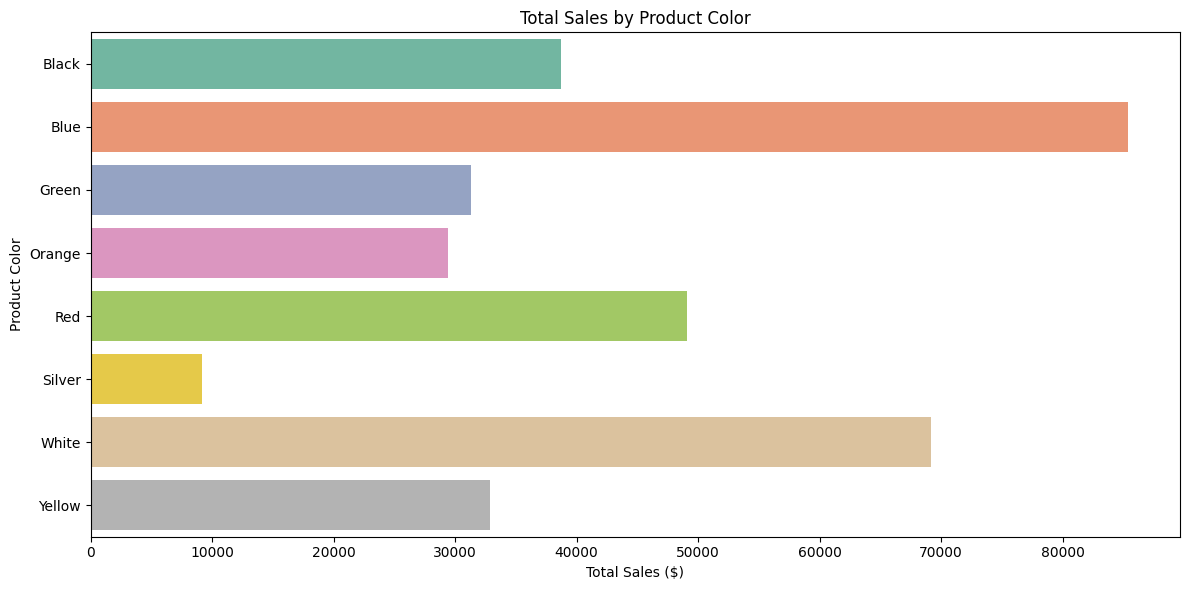

In [185]:
sales_by_color = data.groupby('Product Color')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Color', data=sales_by_color, palette='Set2')
plt.title('Total Sales by Product Color')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Color')
plt.tight_layout()
plt.show()

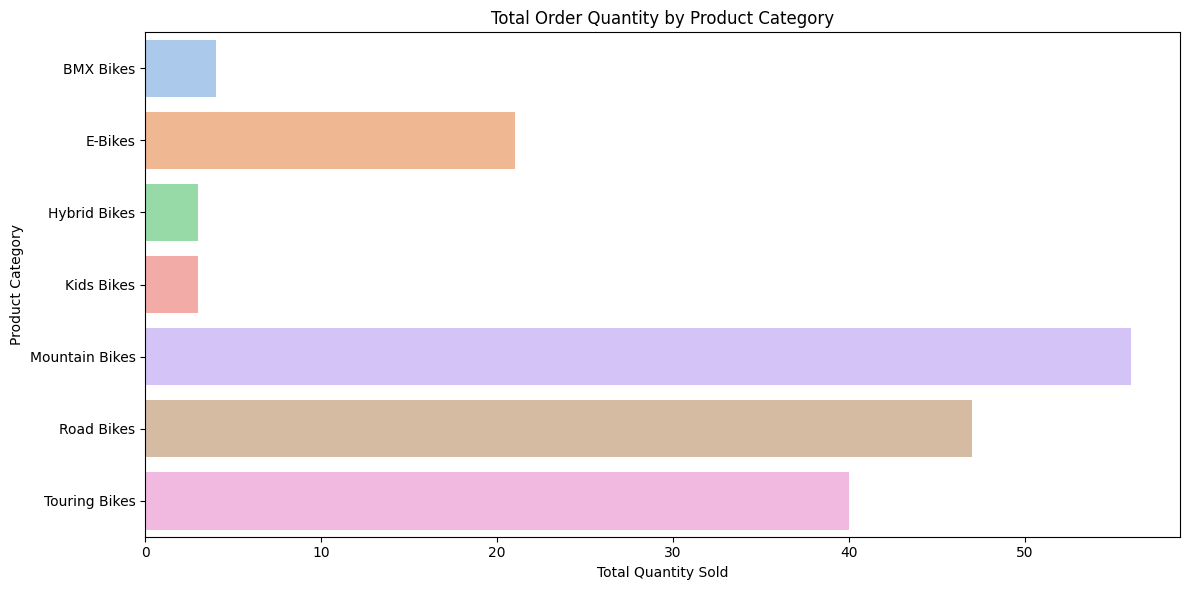

In [186]:
quantity_by_category = data.groupby('Product Category')['Order Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Quantity', y='Product Category', data=quantity_by_category, palette='pastel')
plt.title('Total Order Quantity by Product Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

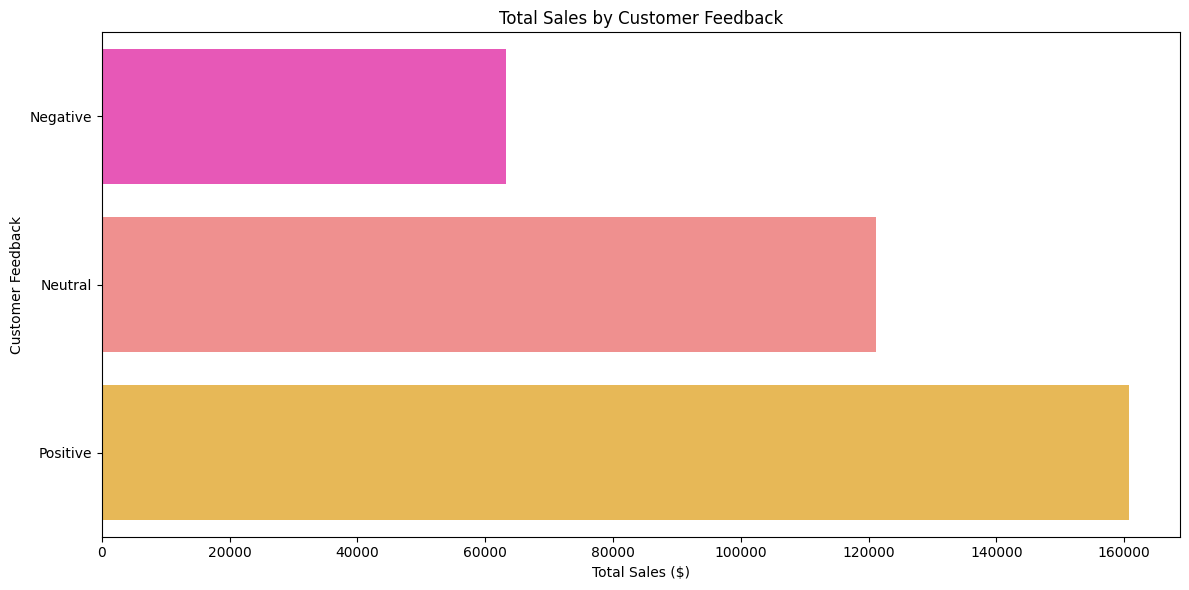

In [187]:
sales_by_feedback = data.groupby('Customer Feedback')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Customer Feedback', data=sales_by_feedback, palette='spring')
plt.title('Total Sales by Customer Feedback')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Feedback')
plt.tight_layout()
plt.show()

# ***6--spliting data and select the features***

In [119]:
features = data[['Product Price', 'Product Weight', 'Order Quantity']]
target = data['Order Total']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ***7-- training the models***

In [138]:

def train_model(X_train, y_train):
    """تدريب النماذج المختلفة وإرجاع النتائج."""
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }
    
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model
    return results

# ***8--evaluatino the models***

In [139]:
def evaluate_models(models, X_test, y_test):
   
    results = {}
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {
            'Mean Squared Error': mse,
            'R^2 Score': r2
        }
    return results


In [141]:
def print_results(results):
    for model_name, metrics in results.items():
        print(f'Model: {model_name}')
        print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
        print(f"  R^2 Score: {metrics['R^2 Score']:.2f}\n")
        

models = train_model(X_train, y_train)
results = evaluate_models(models, X_test, y_test)
print_results(results)

Model: Linear Regression
  Mean Squared Error: 4397618.79
  R^2 Score: 0.86

Model: Random Forest
  Mean Squared Error: 10764631.50
  R^2 Score: 0.66

Model: Gradient Boosting
  Mean Squared Error: 8126771.75
  R^2 Score: 0.74



# ***9--ploting the results***

               Model  Mean Squared Error  R^2 Score
0  Linear Regression        4.397619e+06   0.861773
1      Random Forest        1.063874e+07   0.665600
2  Gradient Boosting        8.119375e+06   0.744789


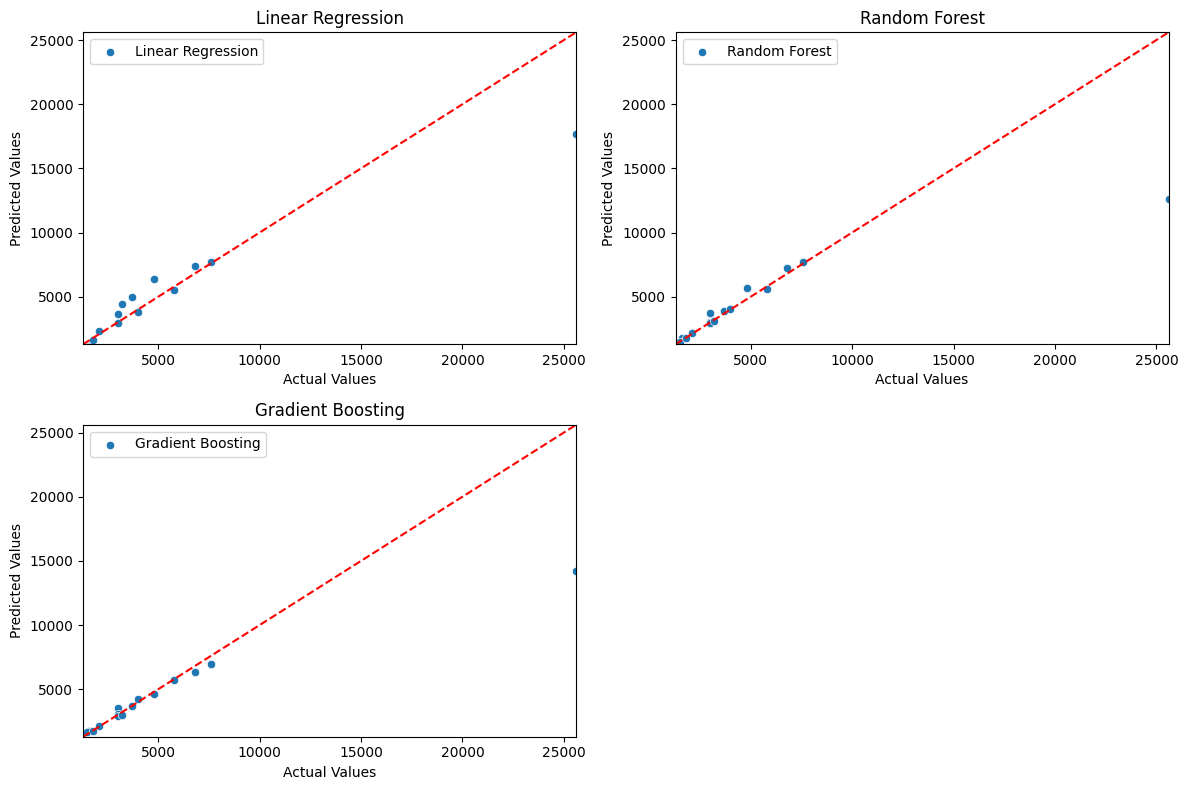

In [154]:
def plot_results(models, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for i, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        plt.subplot(2, 2, i + 1)
        sns.scatterplot(x=y_test, y=y_pred, label=model_name)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط مرجعي
        plt.title(model_name)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.xlim(y_test.min(), y_test.max())
        plt.ylim(y_test.min(), y_test.max())
    
    plt.tight_layout()
    plt.show()
print_results(results_df)
plot_results(models, X_test, y_test)

# ***10--thank you***